In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#load dataset
df=pd.read_csv('https://raw.githubusercontent.com/ds954/Iris_Classification/main/Iris.csv')

In [6]:
#5 rows of dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#information about datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#count duplicate value 
df.duplicated().sum()

0

In [9]:
#check null value 
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [11]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


In [12]:
#Data Wrangling
#drop id column
data=df.iloc[:,1:]

In [13]:
#Data Vizualization

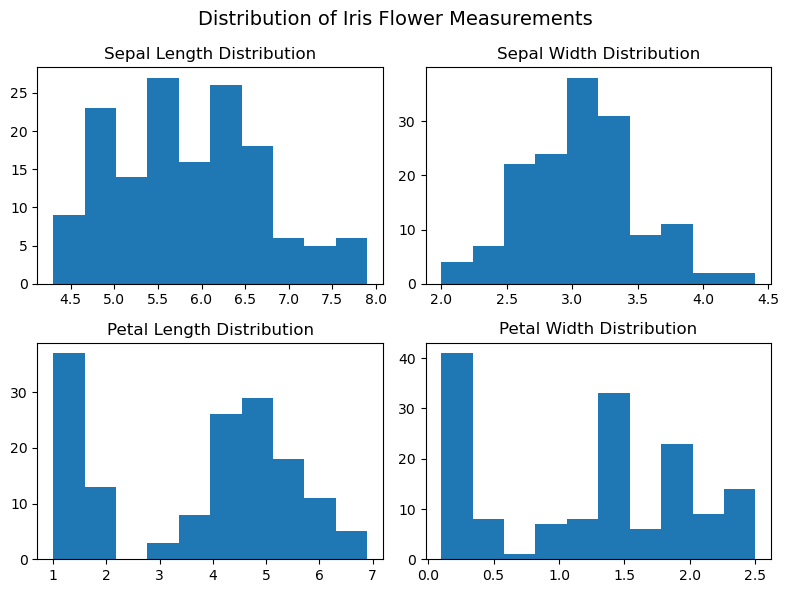

In [14]:
plt.figure(figsize=(8,6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

plt.subplot(2, 2, 1)  
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2) 
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')
plt.tight_layout()  
plt.show()

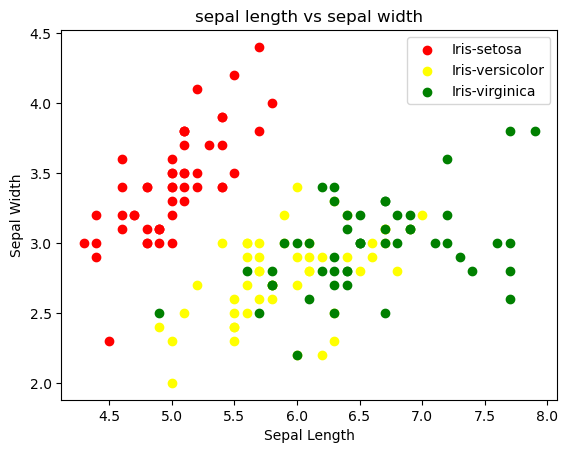

In [15]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()
plt.title("sepal length vs sepal width")
# Display the scatter plot.
plt.show()

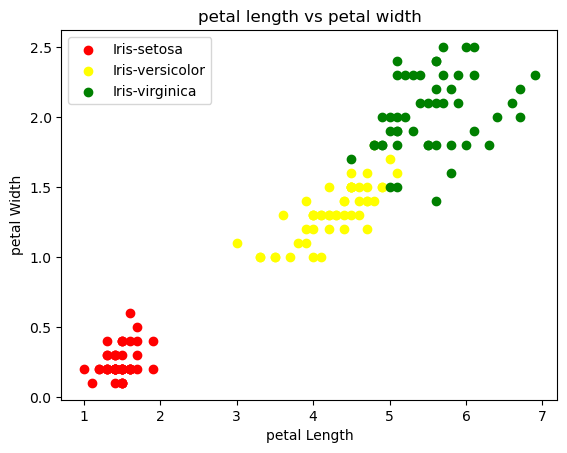

In [16]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('petal Length')
plt.ylabel('petal Width')

# Add a legend to identify species based on colors.
plt.legend()
plt.title("petal length vs petal width")
# Display the scatter plot.
plt.show()

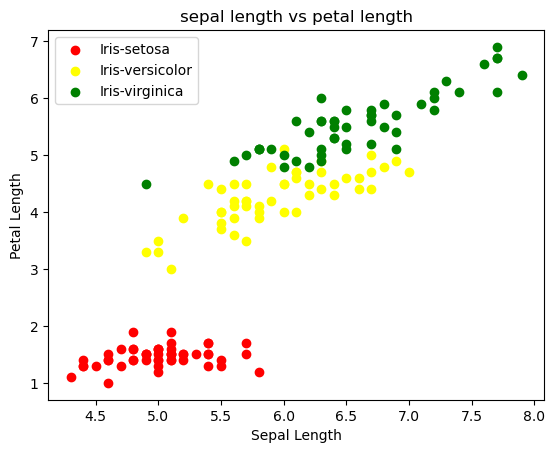

In [17]:
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()
plt.title("sepal length vs petal length")
# Display the scatter plot.
plt.show()

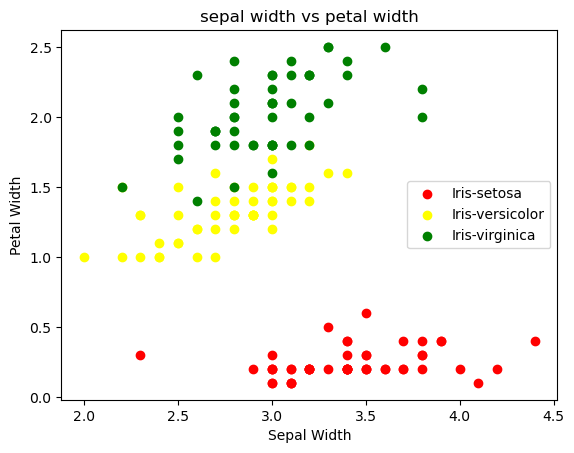

In [18]:
# Create a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()
plt.title("sepal width vs petal width")
# Display the scatter plot.
plt.show()
     

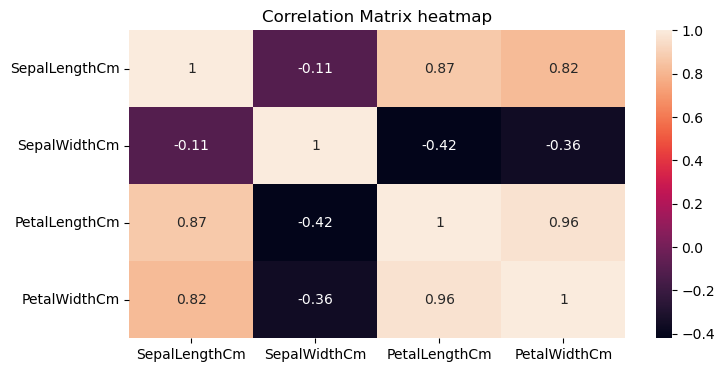

In [19]:
corr_matrix = data.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True,annot_kws={"size": 10})

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

In [20]:
#Feature Engineering & Data Pre-processing

In [21]:
# 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
data['Species'] = le.fit_transform(data['Species'])

# Check the unique values in the 'Species' column after encoding
unique_species = data['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) 

Encoded Species Values:
[0 1 2]


In [22]:
x=data.drop(columns=['Species'],axis=1)
y=data['Species']

In [23]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [24]:
def evaluate_model(model, x_train, x_test, y_train, y_test):

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [25]:
#  Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])
     


Confusion Matrix:


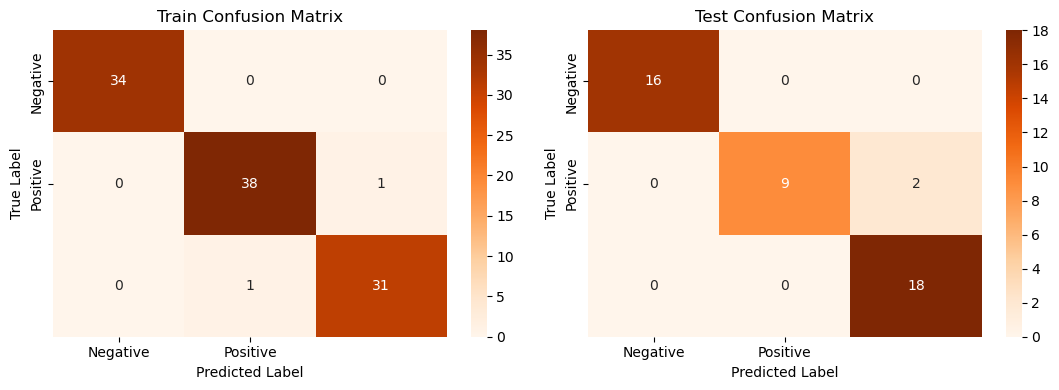


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.974359 | 0.974359 |   0.974359 |  39        |
| 2            |    0.96875  | 0.96875  |   0.96875  |  32        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.981036 | 0.981036 |   0.981036 | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    1        | 0.818182 |   0.9      | 11        |
| 2            |    0.9      | 1        |   0.947368 | 18        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

,Logistic regression
Precision Train,0.980952
Precision Test,0.960000
Recall Train,0.980952
Recall Test,0.955556
Accuracy Train,0.980952
Accuracy Test,0.955556
F1 macro Train,0.980952
F1 macro Test,0.954503


In [26]:
#logistic regression
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

In [27]:
#Tuned logistic regression
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'sag'}


In [28]:

# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


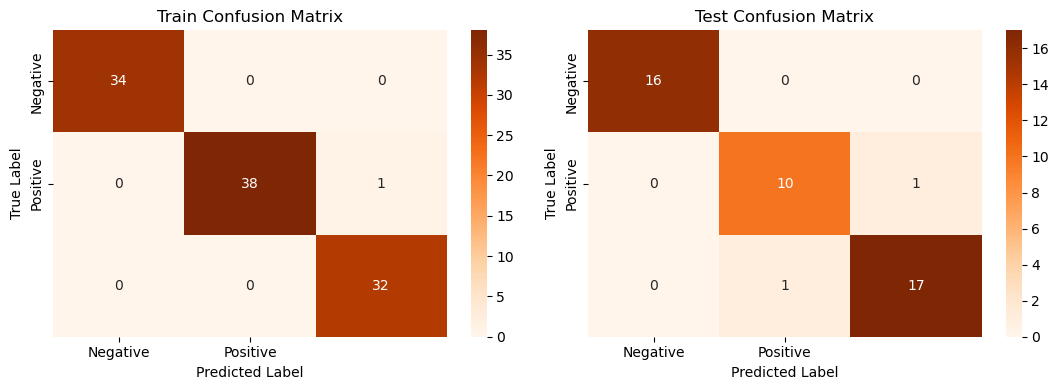


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    1        | 0.974359 |   0.987013 |  39        |
| 2            |    0.969697 | 1        |   0.984615 |  32        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989899 | 0.991453 |   0.990543 | 105        |
| weighted avg |    0.990765 | 0.990476 |   0.990488 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.909091 | 0.909091 |   0.909091 | 11        |
| 2            |    0.944444 | 0.944444 |   0.944444 | 18        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [29]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [30]:
score['Logistic regression tuned'] = lr_score2

In [31]:

# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned
Precision Train,0.980952,0.990765
Precision Test,0.960000,0.955556
Recall Train,0.980952,0.990476
Recall Test,0.955556,0.955556
Accuracy Train,0.980952,0.990476
Accuracy Test,0.955556,0.955556
F1 macro Train,0.980952,0.990488
F1 macro Test,0.954503,0.955556



Confusion Matrix:


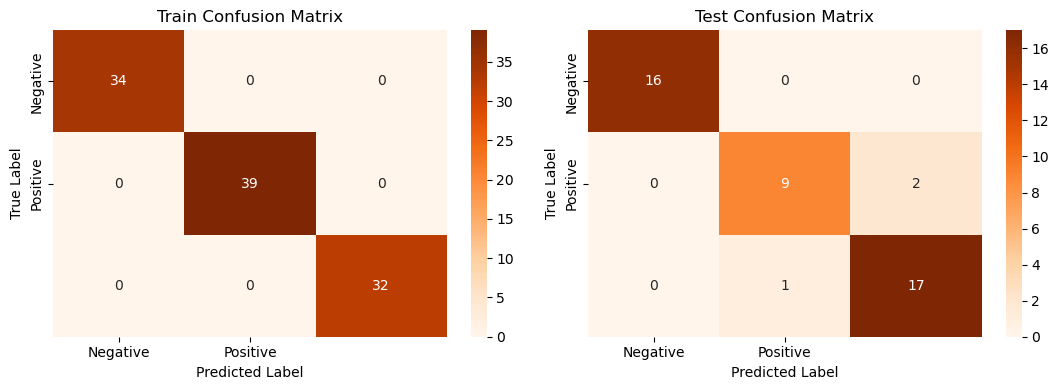


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        34 |
| 1            |           1 |        1 |          1 |        39 |
| 2            |           1 |        1 |          1 |        32 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.9      | 0.818182 |   0.857143 | 11        |
| 2            |    0.894737 | 0.944444 |   0.918919 | 18        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.980952,0.990765,1.000000
Precision Test,0.960000,0.955556,0.933450
Recall Train,0.980952,0.990476,1.000000
Recall Test,0.955556,0.955556,0.933333
Accuracy Train,0.980952,0.990476,1.000000
Accuracy Test,0.955556,0.955556,0.933333
F1 macro Train,0.980952,0.990488,1.000000
F1 macro Test,0.954503,0.955556,0.932647


In [32]:
#ML2
#Decision tree


# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score



Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}

Confusion Matrix:


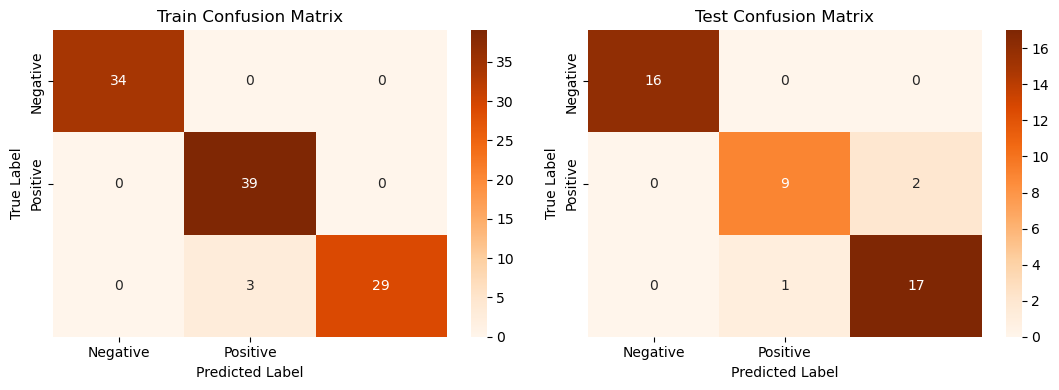


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.928571 | 1        |   0.962963 |  39        |
| 2            |    1        | 0.90625  |   0.95082  |  32        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.97619  | 0.96875  |   0.971261 | 105        |
| weighted avg |    0.973469 | 0.971429 |   0.971255 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.9      | 0.818182 |   0.857143 | 11        |
| 2            |    0.894737 | 0.944444 |   0.918919 | 18        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.980952,0.990765,1.000000,0.973469
Precision Test,0.960000,0.955556,0.933450,0.933450
Recall Train,0.980952,0.990476,1.000000,0.971429
Recall Test,0.955556,0.955556,0.933333,0.933333
Accuracy Train,0.980952,0.990476,1.000000,0.971429
Accuracy Test,0.955556,0.955556,0.933333,0.933333
F1 macro Train,0.980952,0.990488,1.000000,0.971255
F1 macro Test,0.954503,0.955556,0.932647,0.932647


In [33]:
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)

# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)
score['Decision Tree tuned'] = dt2_score
# Updated Evaluation metric Score Chart
score

In [34]:
#random Forest


Confusion Matrix:


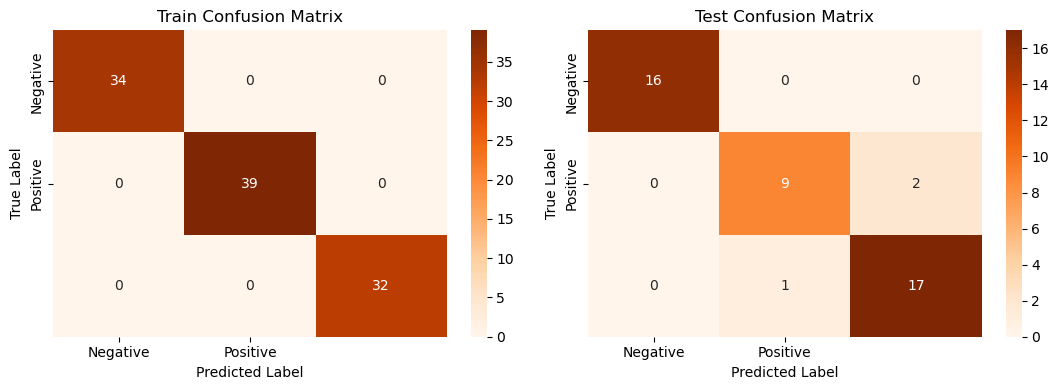


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        34 |
| 1            |           1 |        1 |          1 |        39 |
| 2            |           1 |        1 |          1 |        32 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.9      | 0.818182 |   0.857143 | 11        |
| 2            |    0.894737 | 0.944444 |   0.918919 | 18        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.980952,0.990765,1.000000,0.973469,1.000000
Precision Test,0.960000,0.955556,0.933450,0.933450,0.933450
Recall Train,0.980952,0.990476,1.000000,0.971429,1.000000
Recall Test,0.955556,0.955556,0.933333,0.933333,0.933333
Accuracy Train,0.980952,0.990476,1.000000,0.971429,1.000000
Accuracy Test,0.955556,0.955556,0.933333,0.933333,0.933333
F1 macro Train,0.980952,0.990488,1.000000,0.971255,1.000000
F1 macro Test,0.954503,0.955556,0.932647,0.932647,0.932647


In [35]:
rf_model = RandomForestClassifier(random_state=0)

# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

In [36]:
#Tuned Random Forest


Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 9}

Confusion Matrix:


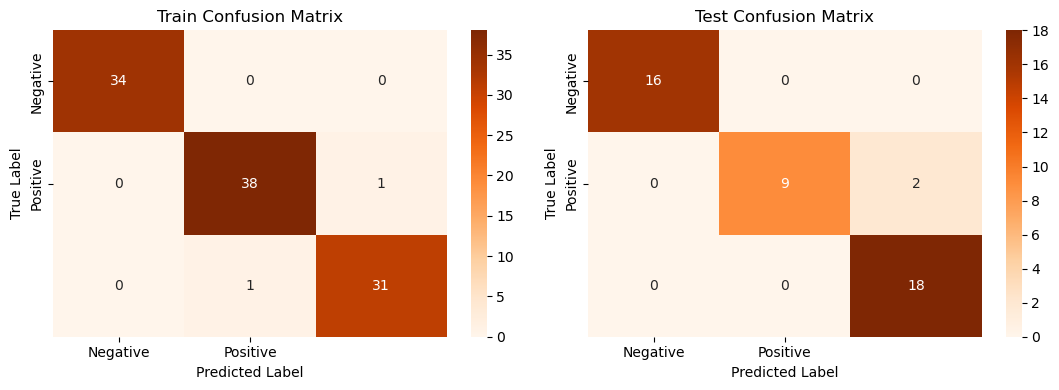


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.974359 | 0.974359 |   0.974359 |  39        |
| 2            |    0.96875  | 0.96875  |   0.96875  |  32        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.981036 | 0.981036 |   0.981036 | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    1        | 0.818182 |   0.9      | 11        |
| 2            |    0.9      | 1        |   0.947368 | 18        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.980952,0.990765,1.000000,0.973469,1.000000,0.980952
Precision Test,0.960000,0.955556,0.933450,0.933450,0.933450,0.960000
Recall Train,0.980952,0.990476,1.000000,0.971429,1.000000,0.980952
Recall Test,0.955556,0.955556,0.933333,0.933333,0.933333,0.955556
Accuracy Train,0.980952,0.990476,1.000000,0.971429,1.000000,0.980952
Accuracy Test,0.955556,0.955556,0.933333,0.933333,0.933333,0.955556
F1 macro Train,0.980952,0.990488,1.000000,0.971255,1.000000,0.980952
F1 macro Test,0.954503,0.955556,0.932647,0.932647,0.932647,0.954503


In [37]:
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)

# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

score['Random Forest tuned'] = rf2_score
# Updated Evaluation metric Score Chart
score

In [38]:
#SVM


Confusion Matrix:


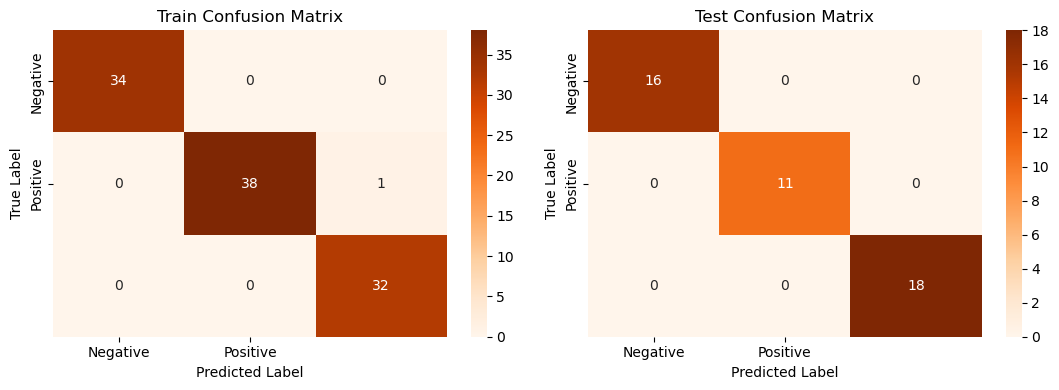


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    1        | 0.974359 |   0.987013 |  39        |
| 2            |    0.969697 | 1        |   0.984615 |  32        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989899 | 0.991453 |   0.990543 | 105        |
| weighted avg |    0.990765 | 0.990476 |   0.990488 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        16 |
| 1            |           1 |        1 |          1 |        11 |
| 2            |           1 |        1 |          1 |        18 |
| accuracy     |           1 |        1 |          1 |        

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.980952,0.990765,1.000000,0.973469,1.000000,0.980952,0.990765
Precision Test,0.960000,0.955556,0.933450,0.933450,0.933450,0.960000,1.000000
Recall Train,0.980952,0.990476,1.000000,0.971429,1.000000,0.980952,0.990476
Recall Test,0.955556,0.955556,0.933333,0.933333,0.933333,0.955556,1.000000
Accuracy Train,0.980952,0.990476,1.000000,0.971429,1.000000,0.980952,0.990476
Accuracy Test,0.955556,0.955556,0.933333,0.933333,0.933333,0.955556,1.000000
F1 macro Train,0.980952,0.990488,1.000000,0.971255,1.000000,0.980952,0.990488
F1 macro Test,0.954503,0.955556,0.932647,0.932647,0.932647,0.954503,1.000000


In [39]:
svm_model = SVC(kernel='linear', random_state=0, probability=True)
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

In [40]:
#SVM Tuned

Best hyperparameters:  {'kernel': 'poly', 'degree': 3, 'C': 3.2}

Confusion Matrix:


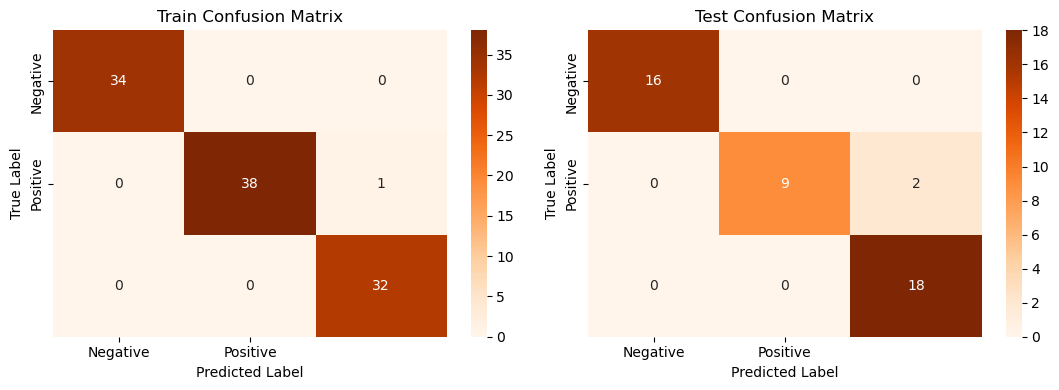


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    1        | 0.974359 |   0.987013 |  39        |
| 2            |    0.969697 | 1        |   0.984615 |  32        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989899 | 0.991453 |   0.990543 | 105        |
| weighted avg |    0.990765 | 0.990476 |   0.990488 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    1        | 0.818182 |   0.9      | 11        |
| 2            |    0.9      | 1        |   0.947368 | 18        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.980952,0.990765,1.000000,0.973469,1.000000,0.980952,0.990765,0.990765
Precision Test,0.960000,0.955556,0.933450,0.933450,0.933450,0.960000,1.000000,0.960000
Recall Train,0.980952,0.990476,1.000000,0.971429,1.000000,0.980952,0.990476,0.990476
Recall Test,0.955556,0.955556,0.933333,0.933333,0.933333,0.955556,1.000000,0.955556
Accuracy Train,0.980952,0.990476,1.000000,0.971429,1.000000,0.980952,0.990476,0.990476
Accuracy Test,0.955556,0.955556,0.933333,0.933333,0.933333,0.955556,1.000000,0.955556
F1 macro Train,0.980952,0.990488,1.000000,0.971255,1.000000,0.980952,0.990488,0.990488
F1 macro Test,0.954503,0.955556,0.932647,0.932647,0.932647,0.954503,1.000000,0.954503


In [41]:
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)

# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

score['SVM tuned'] = svm2_score
# Updated Evaluation metric Score Chart
score

In [42]:
#ML Model - 5 : Xtreme Gradient Boosting


Confusion Matrix:


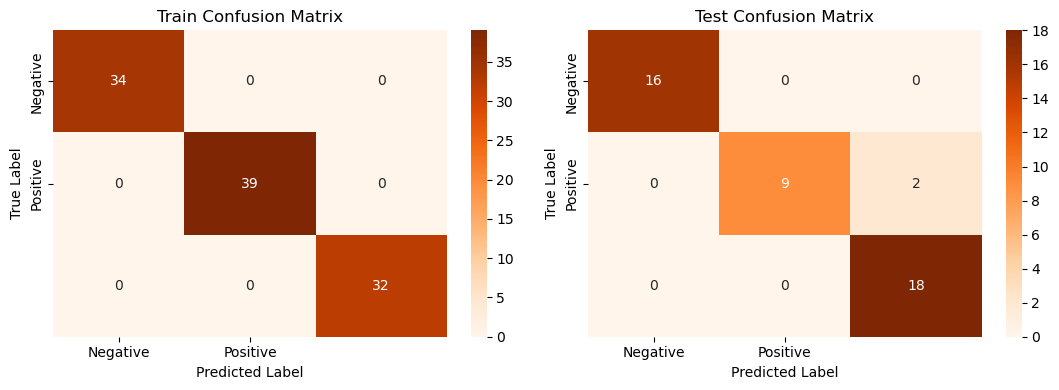


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        34 |
| 1            |           1 |        1 |          1 |        39 |
| 2            |           1 |        1 |          1 |        32 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    1        | 0.818182 |   0.9      | 11        |
| 2            |    0.9      | 1        |   0.947368 | 18        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.980952,0.990765,1.000000,0.973469,1.000000,0.980952,0.990765,0.990765,1.000000
Precision Test,0.960000,0.955556,0.933450,0.933450,0.933450,0.960000,1.000000,0.960000,0.960000
Recall Train,0.980952,0.990476,1.000000,0.971429,1.000000,0.980952,0.990476,0.990476,1.000000
Recall Test,0.955556,0.955556,0.933333,0.933333,0.933333,0.955556,1.000000,0.955556,0.955556
Accuracy Train,0.980952,0.990476,1.000000,0.971429,1.000000,0.980952,0.990476,0.990476,1.000000
Accuracy Test,0.955556,0.955556,0.933333,0.933333,0.933333,0.955556,1.000000,0.955556,0.955556
F1 macro Train,0.980952,0.990488,1.000000,0.971255,1.000000,0.980952,0.990488,0.990488,1.000000
F1 macro Test,0.954503,0.955556,0.932647,0.932647,0.932647,0.954503,1.000000,0.954503,0.954503


In [43]:
xgb_model = xgb.XGBClassifier()

# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

# Updated Evaluation metric Score Chart
score['XGB'] = xgb_score
score

In [46]:
#ML Model - 6 : Naive Bayes


Confusion Matrix:


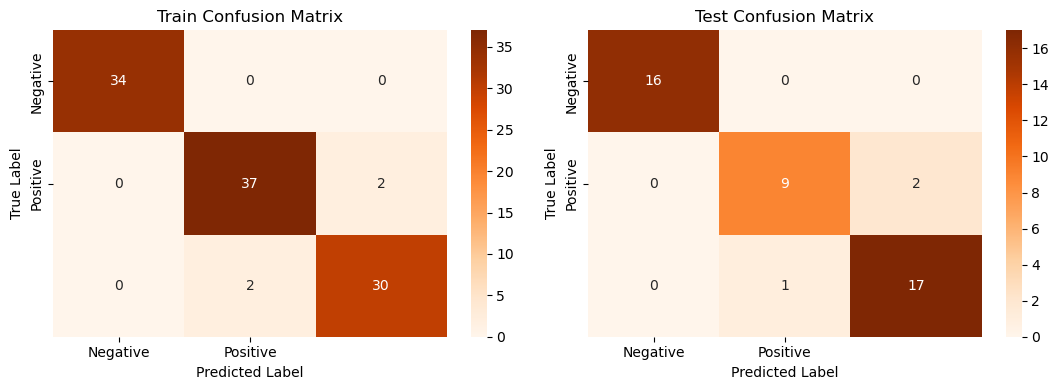


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.948718 | 0.948718 |   0.948718 |  39        |
| 2            |    0.9375   | 0.9375   |   0.9375   |  32        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.962073 | 0.962073 |   0.962073 | 105        |
| weighted avg |    0.961905 | 0.961905 |   0.961905 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.9      | 0.818182 |   0.857143 | 11        |
| 2            |    0.894737 | 0.944444 |   0.918919 | 18        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,Naive Bayes
Precision Train,0.980952,0.990765,1.000000,0.973469,1.000000,0.980952,0.990765,0.990765,1.000000,0.961905
Precision Test,0.960000,0.955556,0.933450,0.933450,0.933450,0.960000,1.000000,0.960000,0.960000,0.933450
Recall Train,0.980952,0.990476,1.000000,0.971429,1.000000,0.980952,0.990476,0.990476,1.000000,0.961905
Recall Test,0.955556,0.955556,0.933333,0.933333,0.933333,0.955556,1.000000,0.955556,0.955556,0.933333
Accuracy Train,0.980952,0.990476,1.000000,0.971429,1.000000,0.980952,0.990476,0.990476,1.000000,0.961905
Accuracy Test,0.955556,0.955556,0.933333,0.933333,0.933333,0.955556,1.000000,0.955556,0.955556,0.933333
F1 macro Train,0.980952,0.990488,1.000000,0.971255,1.000000,0.980952,0.990488,0.990488,1.000000,0.961905
F1 macro Test,0.954503,0.955556,0.932647,0.932647,0.932647,0.954503,1.000000,0.954503,0.954503,0.932647


In [47]:
nb_model = GaussianNB()
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

In [48]:
#Tuned Navie Byes 

Best hyperparameters:  {'var_smoothing': 0.006579332246575682}

Confusion Matrix:


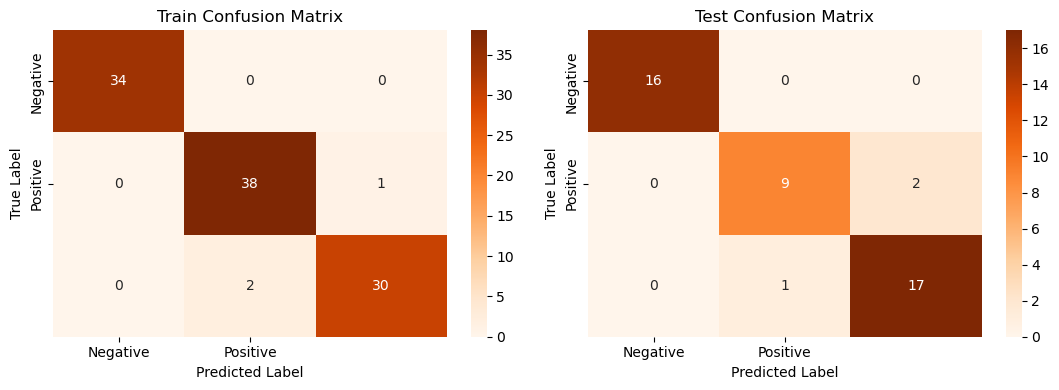


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.95     | 0.974359 |   0.962025 |  39        |
| 2            |    0.967742 | 0.9375   |   0.952381 |  32        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.972581 | 0.97062  |   0.971469 | 105        |
| weighted avg |    0.971598 | 0.971429 |   0.971383 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.9      | 0.818182 |   0.857143 | 11        |
| 2            |    0.894737 | 0.944444 |   0.918919 | 18        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,Naive Bayes,Naive Bayes tuned
Precision Train,0.980952,0.990765,1.000000,0.973469,1.000000,0.980952,0.990765,0.990765,1.000000,0.961905,0.971598
Precision Test,0.960000,0.955556,0.933450,0.933450,0.933450,0.960000,1.000000,0.960000,0.960000,0.933450,0.933450
Recall Train,0.980952,0.990476,1.000000,0.971429,1.000000,0.980952,0.990476,0.990476,1.000000,0.961905,0.971429
Recall Test,0.955556,0.955556,0.933333,0.933333,0.933333,0.955556,1.000000,0.955556,0.955556,0.933333,0.933333
Accuracy Train,0.980952,0.990476,1.000000,0.971429,1.000000,0.980952,0.990476,0.990476,1.000000,0.961905,0.971429
Accuracy Test,0.955556,0.955556,0.933333,0.933333,0.933333,0.955556,1.000000,0.955556,0.955556,0.933333,0.933333
F1 macro Train,0.980952,0.990488,1.000000,0.971255,1.000000,0.980952,0.990488,0.990488,1.000000,0.961905,0.971383
F1 macro Test,0.954503,0.955556,0.932647,0.932647,0.932647,0.954503,1.000000,0.954503,0.954503,0.932647,0.932647


In [49]:
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])

# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

score['Naive Bayes tuned']= nb2_score
# Updated Evaluation metric Score Chart
score

In [63]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Decision Tree tuned,0.973469,0.93345,0.971429,0.933333,0.971429,0.933333,0.971255,0.932647
Naive Bayes,0.961905,0.93345,0.961905,0.933333,0.961905,0.933333,0.961905,0.932647
Naive Bayes tuned,0.971598,0.93345,0.971429,0.933333,0.971429,0.933333,0.971383,0.932647


In [64]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [65]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Decision Tree tuned - 0.9335
Recall: Decision Tree tuned - 0.9333
Accuracy: Decision Tree tuned - 0.9333
F1 macro: Decision Tree tuned - 0.9326


In [67]:

# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Decision Tree tuned    |       0.971429 |      0.933333 |
| Naive Bayes            |       0.961905 |      0.933333 |
| Naive Bayes tuned      |       0.971429 |      0.933333 |


In [68]:
# Define a list of category labels for reference.
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [69]:
# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])

# Use the tuned decision tree tuned to make a prediction.
x_rf_prediction = dt_model2.predict(x_rf)
x_rf_prediction[0]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa
